In [1]:
import sys
import struct
import ctypes
import numpy as np
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import ctypes
%matplotlib notebook

class pointStruct(ctypes.Structure):
    _fields_ = [('lineCount', ctypes.c_int),
                ('allDataPointsCount', ctypes.c_int),
                ('pointCounts', ctypes.POINTER(ctypes.c_int)),
                ('xValues', ctypes.POINTER(ctypes.c_double)),
                ('yValues', ctypes.POINTER(ctypes.c_double)),
                ('zValues', ctypes.POINTER(ctypes.c_double))]
  
mydll = ctypes.cdll.LoadLibrary(r"D:\0nastia\github\RelativicHeavyBall\dlls\LR.dll")

f = mydll.logisticRegressionTarget
mydll.logisticRegressionTarget.restype = ctypes.c_double
mydll.logisticRegressionTarget.argtypes = [ctypes.c_double, ctypes.c_double]

testFunc = mydll.logisticRegressionMulty
mydll.logisticRegressionMulty.restype = ctypes.POINTER(pointStruct)
mydll.logisticRegressionMulty.argtypes = [ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_int, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double , ctypes.c_double] 

ret = testFunc(3, 3, 0, 0, 1000, 0.0001, 0.1, 0.1, 20, 2)

array_pointer = ctypes.cast(ret.contents.pointCounts, ctypes.POINTER(ctypes.c_int * ret.contents.lineCount))
pointCounts = np.frombuffer(array_pointer.contents, dtype = ctypes.c_int)

array_pointer = ctypes.cast(ret.contents.xValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
xValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(ret.contents.yValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
yValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(ret.contents.zValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
zValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

print(ret.contents.lineCount)
print(ret.contents.allDataPointsCount)
print(pointCounts)
print(xValues)
print(yValues)
print(zValues)

class logisticRegressionData(ctypes.Structure):
    _fields_ = [('negativePointCount', ctypes.c_int),
                ('negativePointXValues', ctypes.POINTER(ctypes.c_double)),
                ('negativePointYValues', ctypes.POINTER(ctypes.c_double)),
                
                ('positivePointCount', ctypes.c_int),
                ('positivePointXValues', ctypes.POINTER(ctypes.c_double)),
                ('positivePointYValues', ctypes.POINTER(ctypes.c_double)),
                
                ('lineCount', ctypes.c_int),
                ('lineAParameters', ctypes.POINTER(ctypes.c_double)),
                ('lineBParameters', ctypes.POINTER(ctypes.c_double)),
                ('lineCParameters', ctypes.POINTER(ctypes.c_double))]
    
getLogisticRegressionData = mydll.getLogisticRegressionData
mydll.getLogisticRegressionData.restype = ctypes.POINTER(logisticRegressionData)
mydll.getLogisticRegressionData.argtypes = []

data = getLogisticRegressionData()

array_pointer = ctypes.cast(data.contents.negativePointXValues, ctypes.POINTER(ctypes.c_double * data.contents.negativePointCount))
negativePointXValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.negativePointYValues, ctypes.POINTER(ctypes.c_double * data.contents.negativePointCount))
negativePointYValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(data.contents.positivePointXValues, ctypes.POINTER(ctypes.c_double * data.contents.positivePointCount))
positivePointXValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.positivePointYValues, ctypes.POINTER(ctypes.c_double * data.contents.positivePointCount))
positivePointYValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(data.contents.lineAParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineAParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.lineBParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineBParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.lineCParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineCParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

print(negativePointXValues)
print(negativePointYValues)
print(positivePointXValues)
print(positivePointYValues)
print(lineAParameters)
print(lineBParameters)
print(lineCParameters)

4
4012
[1003 1003 1003 1003]
[ 0.          0.01993333  0.07946667 ... -1.24329144 -1.2432916
 -1.24329194]
[3.         2.95001717 2.80073732 ... 0.32205956 0.32205953 0.3220595 ]
[96.09000031 93.09049846 84.13300992 ...  4.25392083  4.25392083
  4.25392083]
[1. 2. 3. 4.]
[4. 5. 6. 7.]
[1. 4. 5. 6. 7.]
[7. 3. 2. 1. 0.]
[0.2888631  0.59144773 0.27424848 0.3220595 ]
[-0.49817367 -1.94387259 -0.47618349 -0.49664259]
[-1.32705965 -3.83403773 -1.33397737 -1.24329194]


In [2]:
print(xValues[1900:2006])

[-3.83214163 -3.83216834 -3.83219484 -3.83222113 -3.8322472  -3.83227306
 -3.83229872 -3.83232416 -3.8323494  -3.83237444 -3.83239927 -3.83242391
 -3.83244834 -3.83247258 -3.83249662 -3.83252047 -3.83254412 -3.83256759
 -3.83259086 -3.83261395 -3.83263685 -3.83265957 -3.8326821  -3.83270445
 -3.83272662 -3.83274861 -3.83277042 -3.83279206 -3.83281352 -3.83283481
 -3.83285592 -3.83287687 -3.83289765 -3.83291826 -3.8329387  -3.83295898
 -3.83297909 -3.83299904 -3.83301883 -3.83303846 -3.83305794 -3.83307725
 -3.83309641 -3.83311541 -3.83313426 -3.83315296 -3.83317151 -3.83318991
 -3.83320816 -3.83322626 -3.83324421 -3.83326202 -3.83327969 -3.83329722
 -3.8333146  -3.83333184 -3.83334894 -3.83336591 -3.83338274 -3.83339943
 -3.83341598 -3.83343241 -3.8334487  -3.83346486 -3.83348089 -3.83349679
 -3.83351256 -3.8335282  -3.83354372 -3.83355911 -3.83357438 -3.83358952
 -3.83360454 -3.83361944 -3.83363422 -3.83364889 -3.83366343 -3.83367785
 -3.83369216 -3.83370636 -3.83372043 -3.8337344  -3

<IPython.core.display.Javascript object>


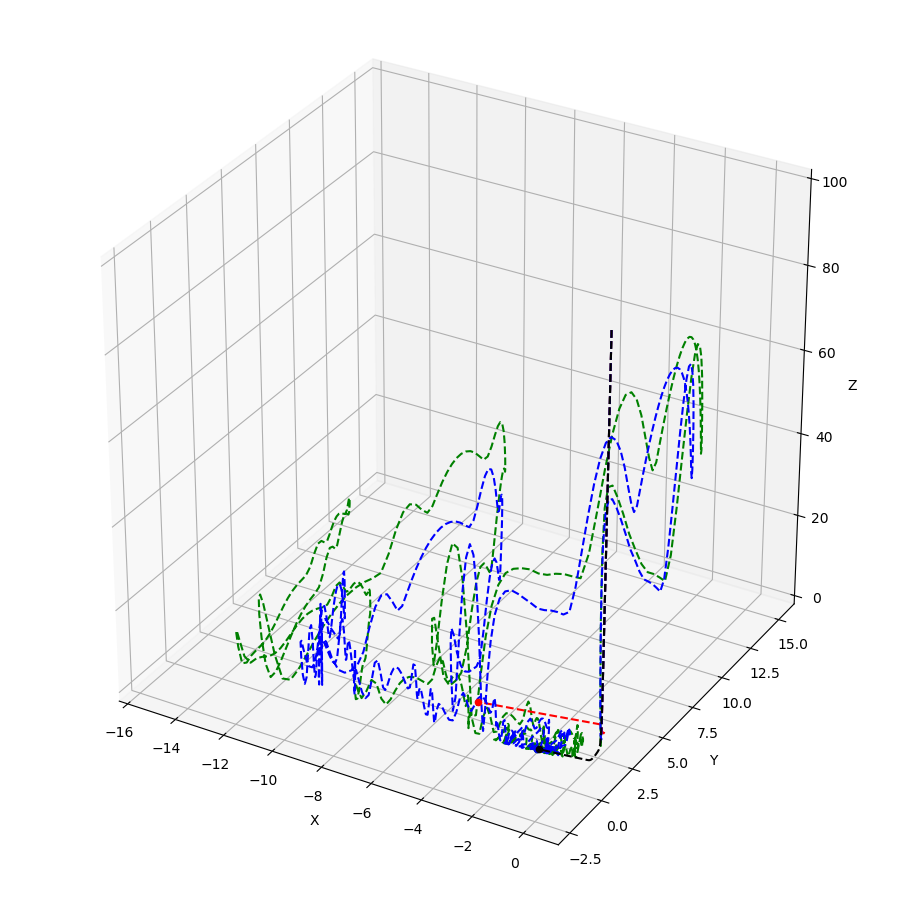

In [3]:
fig = plt.figure(figsize = (9, 9)) 
axe = p3.Axes3D(fig)

def gen1(n):
    for i in range(n):
        yield np.array([xValues[i], yValues[i], zValues[i]])
        
def gen2(n):
    for i in range(n):
        yield np.array([xValues[pointCounts[0] + i], yValues[pointCounts[0] + i], zValues[pointCounts[0] + i]])
        
def gen3(n):
    for i in range(n):
        yield np.array([xValues[pointCounts[0] + pointCounts[1] + i], yValues[pointCounts[0] + pointCounts[1] + i], zValues[pointCounts[0] + pointCounts[1] + i]])

def gen4(n):
    for i in range(n):
        yield np.array([xValues[pointCounts[0] + pointCounts[1] + pointCounts[2] + i], yValues[pointCounts[0] + pointCounts[1] + pointCounts[2] + i], zValues[pointCounts[0] + pointCounts[1] + pointCounts[2] + i]])
        
def animate(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

n1 = pointCounts[0]
data1 = np.array(list(gen1(n1))).T
line1, = axe.plot(data1[0, 0:1], data1[1, 0:1], data1[2, 0:1], 'g--')

n2 = pointCounts[1]
data2 = np.array(list(gen2(n2))).T
line2, = axe.plot(data2[0, 0:1], data2[1, 0:1], data2[2, 0:1], 'r--')

n3 = pointCounts[2]
data3 = np.array(list(gen3(n3))).T
line3, = axe.plot(data3[0, 0:1], data3[1, 0:1], data3[2, 0:1], 'b--')

n4 = pointCounts[3]
data4 = np.array(list(gen4(n4))).T
line4, = axe.plot(data4[0, 0:1], data4[1, 0:1], data4[2, 0:1], 'k--')

nx = 100
ny = 100
ax = -16.
bx = 1.0
ay = -3.0
by = 16.0

axe.set_xlim3d([ax, bx])
axe.set_xlabel('X')

axe.set_ylim3d([ay, by])
axe.set_ylabel('Y')

axe.set_zlim3d([0.0, 100])
axe.set_zlabel('Z')

colors = ['g', 'r', 'b', 'k']
s = 0
for x in range(ret.contents.lineCount):
    s += pointCounts[x]
    axe.scatter3D(xValues[s - 1], yValues[s - 1], zValues[s - 1], color = colors[x])

ani1 = animation.FuncAnimation(fig, animate, n1, fargs=(data1, line1), interval=1, blit=False, repeat=False)
ani2 = animation.FuncAnimation(fig, animate, n2, fargs=(data2, line2), interval=1, blit=False, repeat=False)
ani3 = animation.FuncAnimation(fig, animate, n3, fargs=(data3, line3), interval=1, blit=False, repeat=False)
ani4 = animation.FuncAnimation(fig, animate, n4, fargs=(data4, line4), interval=1, blit=False, repeat=False)

plt.show();

<IPython.core.display.Javascript object>


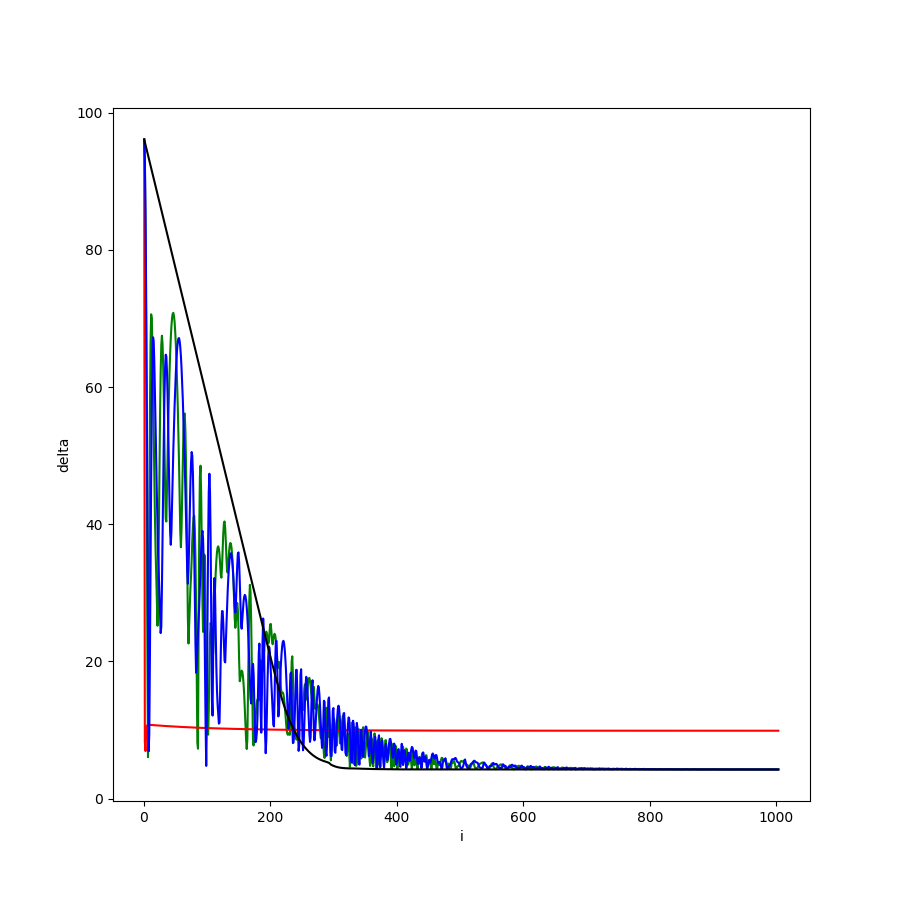

In [4]:
fig = plt.figure(figsize = (9, 9)) 

count = pointCounts[0]
iterations = [i+1 for i in range(count)]

a = 0

for x in range(ret.contents.lineCount):     
    sh=0
    sz=count - sh
    plt.plot(iterations[sh:sh + sz], zValues[a + sh:a+sh + sz], color = colors[x])
    a += pointCounts[x]

plt.ylabel('delta')
plt.xlabel('i')
plt.show()

<IPython.core.display.Javascript object>


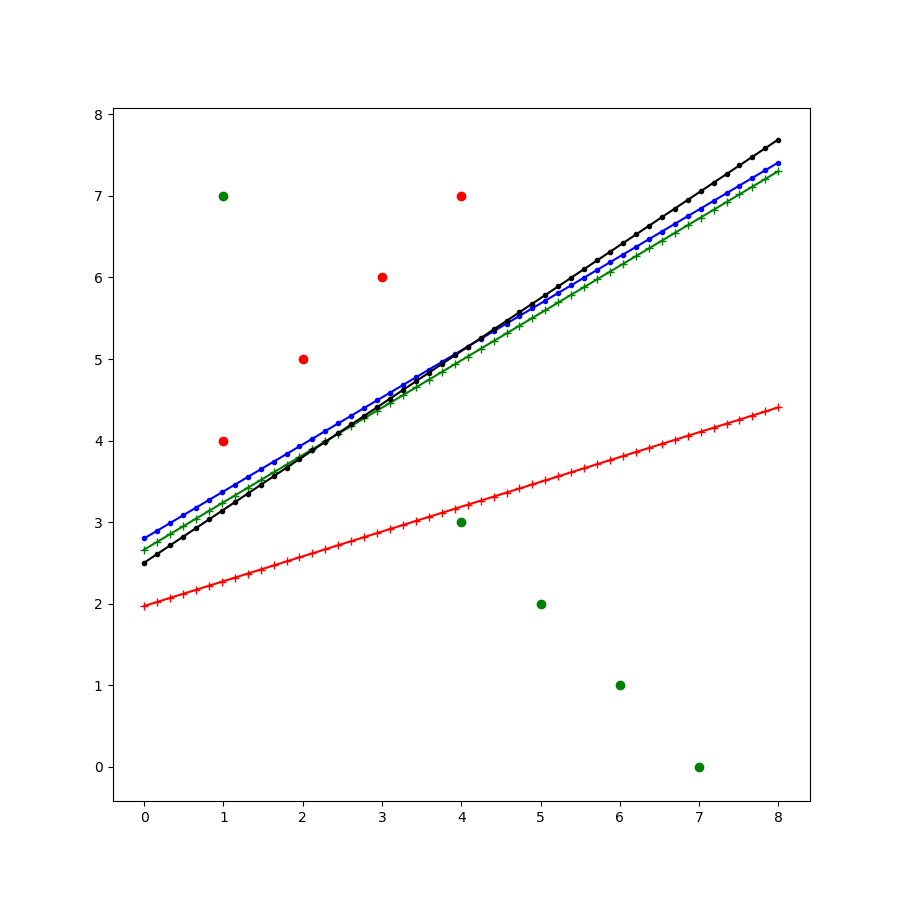

[2.6638494523189227, 2.7585178884034165, 2.853186324487911, 2.947854760572406, 3.0425231966569, 3.1371916327413945, 3.231860068825889, 3.326528504910383, 3.4211969409948777, 3.515865377079372, 3.6105338131638667, 3.705202249248361, 3.799870685332855, 3.8945391214173495, 3.9892075575018437, 4.0838759935863385, 4.178544429670833, 4.273212865755327, 4.367881301839821, 4.4625497379243155, 4.557218174008811, 4.651886610093305, 4.746555046177799, 4.841223482262294, 4.935891918346789, 5.030560354431283, 5.125228790515776, 5.219897226600271, 5.314565662684765, 5.40923409876926, 5.503902534853754, 5.5985709709382485, 5.693239407022744, 5.787907843107238, 5.882576279191732, 5.9772447152762265, 6.07191315136072, 6.166581587445215, 6.261250023529709, 6.3559184596142035, 6.450586895698699, 6.545255331783193, 6.639923767867687, 6.7345922039521815, 6.829260640036676, 6.923929076121171, 7.018597512205665, 7.113265948290159, 7.207934384374654, 7.302602820459148]


In [5]:
fig = plt.figure(figsize = (9, 9)) 

n=50

x = np.linspace(0., 8., n)

def f1(i):
    return (-lineAParameters[0]*x[i]+lineCParameters[0])/lineBParameters[0]
def f2(i):
    return (-lineAParameters[1]*x[i]+lineCParameters[1])/lineBParameters[1]
def f3(i):
    return (-lineAParameters[2]*x[i]+lineCParameters[2])/lineBParameters[2]
def f4(i):
    return (-lineAParameters[3]*x[i]+lineCParameters[3])/lineBParameters[3]

y1 = [f1(i) for i in range(n)]
y2 = [f2(i) for i in range(n)]
y3 = [f3(i) for i in range(n)]
y4 = [f4(i) for i in range(n)]

print(y1)

plt.plot(x, y1, color='g', marker='+')
plt.plot(x, y2, color='r', marker='+')
plt.plot(x, y3, color='b', marker='.')
plt.plot(x, y4, color='k', marker='.')

for j in range(data.contents.negativePointCount):
    plt.scatter(negativePointXValues[j], negativePointYValues[j], color = 'r')
    
for j in range(data.contents.positivePointCount):
    plt.scatter(positivePointXValues[j], positivePointYValues[j], color = 'g')